In [1]:
import numpy as np, pandas as pd , matplotlib.pyplot as plt
from glob import glob
from fetch_data import fetch_data

In [2]:
data_time = fetch_data(20240201,20240331,'time')

In [4]:
unique_column = ["match_id"]
data_time = data_time.drop_duplicates(subset=unique_column)

In [5]:
correct_data_per1_per2 = (data_time["period_1"].notna() & data_time["period_2"].notna())

data = data_time[correct_data_per1_per2]

In [6]:
two_set_condition = (data["period_3"].isna())

two_set_matchs = data[two_set_condition]

two_set_matchs = two_set_matchs[["match_id","period_1","period_2"]]

In [7]:
two_set_matchs["period_1"] = pd.to_numeric(two_set_matchs["period_1"],errors='coerce')
two_set_matchs["period_2"] = pd.to_numeric(two_set_matchs["period_2"],errors='coerce')

(array([  8.,   2.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,
          2.,   5.,   4.,  10.,  16.,  25.,  45.,  52.,  89., 109., 131.,
        160., 178., 200., 218., 236., 249., 266., 260., 285., 277., 240.,
        291., 245., 279., 221., 231., 206., 200., 186., 158., 157., 120.,
        161., 115., 132., 108., 115.,  87., 113.,  79.,  81.,  69.,  71.,
         57.,  51.,  62.,  40.,  42.,  32.,  40.,  26.,  25.,  23.,  22.,
         23.,  21.,  13.,  18.,  14.,  11.,  10.,   6.,   3.,   2.,   4.,
          6.,   0.,   4.,   5.,   0.,   3.,   1.,   1.,   1.,   1.,   2.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1., 

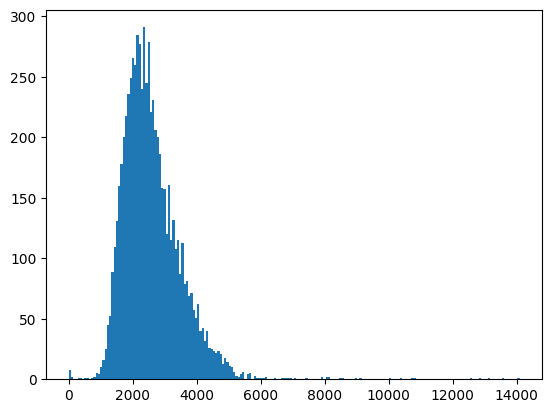

In [8]:
plt.hist(two_set_matchs.query('period_1 < 15000')["period_1"],bins=200)

In [9]:
for i in range(1,3):
    period = f'period_{i}'
    q1 = two_set_matchs[period].quantile(.25)
    q3 = two_set_matchs[period].quantile(.75)
    iqr = q3 - q1

    bottom_range = (two_set_matchs[period] >= (q1 - 1.5 * iqr))
    top_range = (two_set_matchs[period] <=  (q3 + 1.5  * iqr))

    two_set_matchs = two_set_matchs[bottom_range & top_range]

In [10]:
two_set_matchs["match_duration"] = two_set_matchs[["period_1","period_2"]].sum(axis=1)

In [11]:
three_set_condition = (data["period_3"].notna())

three_set_matchs = data[three_set_condition]

three_set_matchs = three_set_matchs[["match_id","period_1","period_2","period_3"]]

In [12]:
three_set_matchs["period_3"] = pd.to_numeric(three_set_matchs["period_3"],errors='coerce')
three_set_matchs["period_3"].describe()

count     3133.000000
mean      3101.126716
std       5608.373869
min          0.000000
25%       1939.000000
50%       2600.000000
75%       3292.000000
max      88380.000000
Name: period_3, dtype: float64

In [13]:
for i in range(1,4):
    period = f'period_{i}'
    q1 = three_set_matchs[period].quantile(.25)
    q3 = three_set_matchs[period].quantile(.75)
    iqr = q3 - q1

    bottom_range = (three_set_matchs[period] >= (q1 - 1.5 * iqr))
    top_range = (three_set_matchs[period] <=  (q3 + 1.5  * iqr))

    three_set_matchs = three_set_matchs[bottom_range & top_range]

three_set_matchs

,match_id,period_1,period_2,period_3
2,11998445,3259,2639,4202
7,11998450,1606,4771,2051
8,11998451,3182,1960,2034
9,11998456,2218,2419,2975
12,11998667,2508,2868,2528
...,...,...,...,...
35628,12212023,2654,2387,4309
35634,12212068,1969,4154,2454
35636,12212077,1926,1527,2338
35659,12213156,3087,3332,1792


In [14]:
three_set_matchs["match_duration"] = three_set_matchs[["period_1","period_2","period_3"]].sum(axis=1)

In [15]:
two_set_matchs = two_set_matchs[["match_id","match_duration"]]
three_set_matchs = three_set_matchs[["match_id","match_duration"]]

In [16]:
data = pd.concat([two_set_matchs,three_set_matchs])

data.to_csv("../data/external/11/duration_of_matches.csv",index=False)


data

,match_id,match_duration
3,11998446,4863
4,11998447,5654
5,11998448,5729
6,11998449,4208
10,11998459,5181
...,...,...
35628,12212023,9350
35634,12212068,8577
35636,12212077,5791
35659,12213156,8211


In [17]:
average_duration_of_matches = float(data["match_duration"].mean())
average_duration_of_matches

6055.799668874172